# Diabetes Prediction Model


In [76]:
import pandas as pd

### Load the dataset

In [77]:
df = pd.read_csv('./data/diabetes.csv')

### Describe the dataset


In [78]:
df.shape

(441456, 330)

In [79]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


### insight

Our dataset contains 441456 of rows and 330 features. This data is derived from the Behavioural Risk Factor Surveillance System powered by the Center for Diseases Control that they conduct yearly. The dataset consists of responses that are general but my focus for this model is to predict based on certain risk factors diabetes type 2. Therefore we will only select the features that are best suited for labelling a patient as diabetes type 2 positive or negative

The following risk factors are our concern for diabetes analysis:
- blood pressure (high)
- cholesterol (high)
- smoking
- diabetes
- obesity
- age
- sex
- race
- diet
- exercise
- alcohol consumption
- BMI (overweight)
- household Income
- poor sleep
- time since last checkup
- health care coverage

In [81]:
# select specific columns
df_selected = df[['DIABETE3',
                  '_RFHYPE5',  
                  'TOLDHI2', '_CHOLCHK', 
                  '_BMI5', 
                  'SMOKE100', 
                  'CVDSTRK3', '_MICHD', 
                  '_TOTINDA', 
                  '_FRTLT1', '_VEGLT1', 
                  '_RFDRHV5', 
                  'HLTHPLN1', 'MEDCOST', 
                  'GENHLTH', 'PHYSHLTH', 'DIFFWALK', 
                  'SEX', '_PRACE1', '_AGEG5YR', 'INCOME2' ]]

In [82]:
df_selected.shape

(441456, 21)

In [83]:
df_selected.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,PHYSHLTH,DIFFWALK,SEX,_PRACE1,_AGEG5YR,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,5.0,15.0,1.0,2.0,1.0,9.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,...,1.0,2.0,1.0,3.0,88.0,2.0,2.0,1.0,7.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,...,9.0,1.0,2.0,4.0,15.0,NaN,2.0,1.0,11.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,5.0,30.0,1.0,2.0,1.0,9.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,...,1.0,1.0,2.0,5.0,20.0,2.0,2.0,1.0,9.0,77.0


In [84]:
df_selected.tail(20)

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,PHYSHLTH,DIFFWALK,SEX,_PRACE1,_AGEG5YR,INCOME2
441436,1.0,2.0,1.0,1.0,2489.0,2.0,2.0,1.0,2.0,1.0,...,1.0,1.0,2.0,5.0,88.0,1.0,2.0,1.0,13.0,4.0
441437,3.0,1.0,1.0,1.0,2468.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,1.0,88.0,2.0,1.0,2.0,6.0,99.0
441438,3.0,1.0,NaN,3.0,1785.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0,77.0
441439,1.0,2.0,1.0,1.0,2539.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,3.0,88.0,2.0,2.0,1.0,11.0,77.0
441440,3.0,1.0,NaN,3.0,2403.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,88.0,2.0,1.0,1.0,9.0,1.0
441441,3.0,2.0,2.0,1.0,3119.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,4.0,30.0,1.0,1.0,1.0,9.0,3.0
441442,3.0,2.0,1.0,1.0,2340.0,2.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,4.0,5.0,2.0,1.0,6.0,8.0,2.0
441443,3.0,1.0,NaN,3.0,2303.0,1.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,3.0,88.0,2.0,2.0,1.0,3.0,2.0
441444,3.0,1.0,NaN,3.0,NaN,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,6.0
441445,3.0,1.0,2.0,1.0,2750.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,3.0,88.0,2.0,1.0,1.0,10.0,77.0


In [85]:
df_selected.isnull().sum()

DIABETE3        7
_RFHYPE5        0
TOLDHI2     59154
_CHOLCHK        0
_BMI5       36398
SMOKE100    14255
CVDSTRK3        0
_MICHD       3942
_TOTINDA        0
_FRTLT1         0
_VEGLT1         0
_RFDRHV5        0
HLTHPLN1        0
MEDCOST         1
GENHLTH         2
PHYSHLTH        1
DIFFWALK    12334
SEX             0
_PRACE1         0
_AGEG5YR        0
INCOME2      3301
dtype: int64

In [86]:
#percentage of missing values
(df_selected.isnull().sum() / len(df_selected)) * 100

DIABETE3     0.001586
_RFHYPE5     0.000000
TOLDHI2     13.399750
_CHOLCHK     0.000000
_BMI5        8.244989
SMOKE100     3.229087
CVDSTRK3     0.000000
_MICHD       0.892954
_TOTINDA     0.000000
_FRTLT1      0.000000
_VEGLT1      0.000000
_RFDRHV5     0.000000
HLTHPLN1     0.000000
MEDCOST      0.000227
GENHLTH      0.000453
PHYSHLTH     0.000227
DIFFWALK     2.793936
SEX          0.000000
_PRACE1      0.000000
_AGEG5YR     0.000000
INCOME2      0.747753
dtype: float64

### insight

from this we can see that the columns that have missing values of concern are:
- TOLDHI2
- _BMI5

These two columns have the percntage of data that's missing to be above 5%.

For TOLDHI2, which is a categorical column, we will create another category 'Missing' and fill its with it.

For _BMI5, a numerical column, check below

For the rest we can afford to drop the rows as they're percentages are below 5% which is manageable

In [87]:
skew_bmi = df_selected['_BMI5'].skew()
print(f"Skewness of _BMI5: {skew_bmi:.2f}")

Skewness of _BMI5: 2.24


The BMI column is a numerical column which can be handled by imputation. Since the skewness, which is at 2.24 is >1, we can therefore conclude that imputing with means would be ideal

### Data Cleaning


before we get into the specifics let's first deal with the values in the dataset

In [88]:
df_selected.tail()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,PHYSHLTH,DIFFWALK,SEX,_PRACE1,_AGEG5YR,INCOME2
441451,1.0,2.0,1.0,1.0,1842.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,4.0,88.0,1.0,2.0,6.0,11.0,4.0
441452,3.0,1.0,2.0,1.0,2834.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,88.0,2.0,2.0,6.0,2.0,2.0
441453,3.0,2.0,1.0,1.0,4110.0,1.0,2.0,2.0,9.0,9.0,...,1.0,1.0,2.0,4.0,88.0,2.0,2.0,1.0,11.0,5.0
441454,3.0,2.0,2.0,1.0,2315.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,2.0,3.0,88.0,2.0,1.0,6.0,7.0,1.0
441455,1.0,2.0,1.0,1.0,2469.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,88.0,2.0,2.0,1.0,9.0,2.0


### DIABETE3
we can now move to the first column

let's change the data in that column into ordinal data from 0

The responses had:
1. Yes
2. Yes, but female told only during pregnancy 
3. No 
4. No, pre-diabetes or borderline diabetes 
7. Don’t know/Not Sure 
9. Refused 

`BLANK` Not asked or Missing 

In [89]:
# DIABETE3
# going to make this ordinal. 0 is for no diabetes, 1 is for only during pregnancy, 2 is for pre-diabetes or borderline diabetes, 3 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected.loc[:, 'DIABETE3'] = df_selected['DIABETE3'].replace({3:0, 2:1, 4:2, 1:2})
df_selected = df_selected[df_selected.DIABETE3 != 7]
df_selected = df_selected[df_selected.DIABETE3 != 9]
df_selected.DIABETE3.unique()

array([ 0.,  2.,  1., nan])

we can now drop the missing values in DIABETE3 column

In [90]:
# drop missing values in DIABETE3 column
df_selected = df_selected.dropna(subset=['DIABETE3'])
df_selected.isnull().sum()

DIABETE3        0
_RFHYPE5        0
TOLDHI2     58946
_CHOLCHK        0
_BMI5       36191
SMOKE100    14195
CVDSTRK3        0
_MICHD       3777
_TOTINDA        0
_FRTLT1         0
_VEGLT1         0
_RFDRHV5        0
HLTHPLN1        0
MEDCOST         1
GENHLTH         2
PHYSHLTH        1
DIFFWALK    12289
SEX             0
_PRACE1         0
_AGEG5YR        0
INCOME2      3296
dtype: int64

### 1. _RFHYPE5

Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional 

1. No 
2. Yes 
9. Don’t know/Not Sure/Refused/Missing 

In [91]:
#1 _RFHYPE5
# Change 1 to 0 so it represents No high blood pressure and 2 to 1 so it represents high blood pressure
df_selected.loc[:, '_RFHYPE5'] = df_selected['_RFHYPE5'].replace({1:0, 2:1})
df_selected = df_selected[df_selected._RFHYPE5 != 9]
df_selected._RFHYPE5.unique()

array([1., 0.])

### 2. TOLDHI2
Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? 

1. Yes 
2. No 
7. Don’t know/Not Sure 
9. Refused 

BLANK: Not asked or Missing 


In [92]:
#2 TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected.loc[:,'TOLDHI2'] = df_selected['TOLDHI2'].replace({2:0})
df_selected = df_selected[df_selected.TOLDHI2 != 7]
df_selected = df_selected[df_selected.TOLDHI2 != 9]
df_selected.TOLDHI2.unique()

array([ 1.,  0., nan])

In [93]:
df_selected.loc[:,'TOLDHI2'].dtype

dtype('float64')

* add column for missing

In [94]:
# If you also want to fill missing values with something (e.g., mode, median, or a placeholder)
df_selected['TOLDHI2'] = df_selected['TOLDHI2'].fillna("missing")
df_selected['TOLDHI2'].unique()

array([1.0, 0.0, 'missing'], dtype=object)

In [95]:
df_selected.isnull().sum()

DIABETE3        0
_RFHYPE5        0
TOLDHI2         0
_CHOLCHK        0
_BMI5       35488
SMOKE100    13983
CVDSTRK3        0
_MICHD       3591
_TOTINDA        0
_FRTLT1         0
_VEGLT1         0
_RFDRHV5        0
HLTHPLN1        0
MEDCOST         1
GENHLTH         2
PHYSHLTH        1
DIFFWALK    12109
SEX             0
_PRACE1         0
_AGEG5YR        0
INCOME2      3258
dtype: int64

### 3. _CHOLCHK

Cholesterol check within past five years 

1. Had cholesterol checked in past 5 years 
2. Did not have cholesterol checked in past 5 years 
3. Have never had cholesterol checked 
9. Don’t know/Not Sure Or Refused/Missing 


In [96]:
#3 _CHOLCHK
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
df_selected['_CHOLCHK'] = df_selected['_CHOLCHK'].replace({3:0,2:0})
df_selected = df_selected[df_selected._CHOLCHK != 9]
df_selected._CHOLCHK.unique()

array([1., 0.])

### 4. _BMI5


In [97]:
#4 _BMI5 requires no changes, just  that the BMIs have been multiplied by 100 So for example a BMI of 4018 is really 40.18
df_selected['_BMI5'] = df_selected['_BMI5'] .div(100).round(2)
df_selected._BMI5.unique()

array([40.18, 25.09, 22.04, ..., 12.16, 41.74, 41.59], shape=(3701,))

### impute with medians as the data for bmi was skewed 

In [98]:
# impute with medians
df_selected['_BMI5'] = df_selected['_BMI5'].fillna(df_selected['_BMI5'].median())
df_selected.isnull().sum()

DIABETE3        0
_RFHYPE5        0
TOLDHI2         0
_CHOLCHK        0
_BMI5           0
SMOKE100    13271
CVDSTRK3        0
_MICHD       3327
_TOTINDA        0
_FRTLT1         0
_VEGLT1         0
_RFDRHV5        0
HLTHPLN1        0
MEDCOST         1
GENHLTH         2
PHYSHLTH        0
DIFFWALK    11492
SEX             0
_PRACE1         0
_AGEG5YR        0
INCOME2      3090
dtype: int64

### 5. SMOKE100

Have you smoked at least 100 cigarettes in your entire life?   [Note:  5 packs = 100 cigarettes] 

1. Yes  
2. No 
7. Don’t know/Not Sure 
9. Refused

BLANK Not asked or Missing

In [99]:
#5 SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected['SMOKE100'] = df_selected['SMOKE100'].replace({2:0})
df_selected = df_selected[df_selected.SMOKE100 != 7]
df_selected = df_selected[df_selected.SMOKE100 != 9]
df_selected.SMOKE100.unique()

array([ 1., nan,  0.])

In [100]:
df_selected = df_selected.dropna(subset=['SMOKE100'])
df_selected.isnull().sum()

DIABETE3       0
_RFHYPE5       0
TOLDHI2        0
_CHOLCHK       0
_BMI5          0
SMOKE100       0
CVDSTRK3       0
_MICHD      3147
_TOTINDA       0
_FRTLT1        0
_VEGLT1        0
_RFDRHV5       0
HLTHPLN1       0
MEDCOST        1
GENHLTH        2
PHYSHLTH       0
DIFFWALK       6
SEX            0
_PRACE1        0
_AGEG5YR       0
INCOME2        0
dtype: int64

### 6. CVDSTRK3

(Ever told) you had a stroke.

1. Yes 18,269 4.14 3.03 
2. No 421,897 95.57 96.73 
7. Don’t know/Not sure 1,146 0.26 0.21 
9. Refused 

In [101]:
#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected['CVDSTRK3'] = df_selected['CVDSTRK3'].replace({2:0})
df_selected = df_selected[df_selected.CVDSTRK3 != 7]
df_selected = df_selected[df_selected.CVDSTRK3 != 9]
df_selected.CVDSTRK3.unique()

array([0., 1.])

### 7. _MICHD

Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) 

1. Reported having MI or CHD 
2. Did not report having MI or CHD 

BLANK Not asked or Missing 


In [102]:
#7 _MICHD
#Change 2 to 0 because this means did not have MI or CHD
df_selected['_MICHD'] = df_selected['_MICHD'].replace({2: 0})
df_selected._MICHD.unique()

array([ 0., nan,  1.])

In [103]:
df_selected = df_selected.dropna(subset=['_MICHD'])
df_selected.isnull().sum()

DIABETE3    0
_RFHYPE5    0
TOLDHI2     0
_CHOLCHK    0
_BMI5       0
SMOKE100    0
CVDSTRK3    0
_MICHD      0
_TOTINDA    0
_FRTLT1     0
_VEGLT1     0
_RFDRHV5    0
HLTHPLN1    0
MEDCOST     1
GENHLTH     2
PHYSHLTH    0
DIFFWALK    6
SEX         0
_PRACE1     0
_AGEG5YR    0
INCOME2     0
dtype: int64

### 8. _TOTINDA

Adults who reported doing physical activity or exercise during the past 30 days other than their regular job 

1. Had physical activity or exercise 
2. No physical activity or exercise in last 30 days 
9. Don’t know/Refused/Missing 

Notes: EXERANY2 = 7 or 9 or Missing


In [104]:
#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
df_selected['_TOTINDA'] = df_selected['_TOTINDA'].replace({2:0})
df_selected = df_selected[df_selected._TOTINDA != 9]
df_selected._TOTINDA.unique()

array([0., 1.])

### 9. _FRTLT1

Consume Fruit 1 or more times per day 

1. Consumed fruit one or more times per day 
2. Consumed fruit less than one time per day 
9.  Don´t know, refused or missing values

In [105]:
#9 _FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
df_selected['_FRTLT1'] = df_selected['_FRTLT1'].replace({2:0})
df_selected = df_selected[df_selected._FRTLT1 != 9]
df_selected._FRTLT1.unique()

array([0., 1.])

### 10. _VEGLT1

Consume Vegetables 1 or more times per day 

1 Consumed vegetables one or more times per day  
2 Consumed vegetables less than one time per day 
9 Don´t know, refused or missing values

In [106]:
#10 _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
df_selected['_VEGLT1'] = df_selected['_VEGLT1'].replace({2:0})
df_selected = df_selected[df_selected._VEGLT1 != 9]
df_selected._VEGLT1.unique()

array([1., 0.])

### 11. _RFDRHV5

Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per 
week) 

1. No 
2. Yes 
9. Don’t know/Refused/Missing 

In [107]:
#11 _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
df_selected['_RFDRHV5'] = df_selected['_RFDRHV5'].replace({1:0, 2:1})
df_selected = df_selected[df_selected._RFDRHV5 != 9]
df_selected._RFDRHV5.unique()

array([0., 1.])

### 12. HLTHPLN1

Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or 
government plans such as Medicare, or Indian Health Service?

1. Yes  
2. No  
7. Don’t know/Not Sure 
9. Refused 

In [108]:
#12 HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
df_selected['HLTHPLN1'] = df_selected['HLTHPLN1'].replace({2:0})
df_selected = df_selected[df_selected.HLTHPLN1 != 7]
df_selected = df_selected[df_selected.HLTHPLN1 != 9]
df_selected.HLTHPLN1.unique()

array([1., 0.])

### 13. MEDCOST

Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 

1. Yes  
2. No  
7. Don’t know/Not sure 
9. Refused  

BLANK Not asked or Missing 

In [109]:
#13 MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
df_selected['MEDCOST'] = df_selected['MEDCOST'].replace({2:0})
df_selected = df_selected[df_selected.MEDCOST != 7]
df_selected = df_selected[df_selected.MEDCOST != 9]
df_selected.MEDCOST.unique()

array([ 0.,  1., nan])

In [110]:
df_selected = df_selected.dropna(subset=['MEDCOST'])
df_selected.isnull().sum()

DIABETE3    0
_RFHYPE5    0
TOLDHI2     0
_CHOLCHK    0
_BMI5       0
SMOKE100    0
CVDSTRK3    0
_MICHD      0
_TOTINDA    0
_FRTLT1     0
_VEGLT1     0
_RFDRHV5    0
HLTHPLN1    0
MEDCOST     0
GENHLTH     1
PHYSHLTH    0
DIFFWALK    3
SEX         0
_PRACE1     0
_AGEG5YR    0
INCOME2     0
dtype: int64

### 14. GENHLTH

Would you say that in general your health is: 

1. Excellent 
2. Very good 
3. Good
4. Fair
5. Poor
7. Don’t know/Not Sure 
9. Refused

BLANK Not asked or Missing

In [111]:
#14 GENHLTH
# This is an ordinal variable that I want to keep (1 is Excellent all the way to 5 which represents Poor)
# Remove 7 and 9 for don't know and refused
df_selected = df_selected[df_selected.GENHLTH != 7]
df_selected = df_selected[df_selected.GENHLTH != 9]
df_selected.GENHLTH.unique()

array([ 5.,  3.,  2.,  4.,  1., nan])

In [112]:
df_selected = df_selected.dropna(subset=['GENHLTH'])
df_selected.isnull().sum()

DIABETE3    0
_RFHYPE5    0
TOLDHI2     0
_CHOLCHK    0
_BMI5       0
SMOKE100    0
CVDSTRK3    0
_MICHD      0
_TOTINDA    0
_FRTLT1     0
_VEGLT1     0
_RFDRHV5    0
HLTHPLN1    0
MEDCOST     0
GENHLTH     0
PHYSHLTH    0
DIFFWALK    3
SEX         0
_PRACE1     0
_AGEG5YR    0
INCOME2     0
dtype: int64

### 15. PHYSHLTH

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 
30 days was your physical health not good? 

1 - 30 Number of days 

88 None

77 Don’t know/Not sure 

99 Refused  

BLANK Not asked or Missing 

In [113]:
#15 PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df_selected['PHYSHLTH'] = df_selected['PHYSHLTH'].replace({88:0})
df_selected = df_selected[df_selected.PHYSHLTH != 77]
df_selected = df_selected[df_selected.PHYSHLTH != 99]
df_selected.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14.,  6., 28.,  1.,  7., 10., 20.,  3.,  5.,
       17.,  4., 19., 21., 12., 25.,  8., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

### 16. DIFFWALK

Do you have serious difficulty walking or climbing stairs? 

1. Yes
2. No
7. Don’t know/Not Sure  
9. Refused  

BLANK Not asked or Missing 

In [114]:
#16 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
df_selected['DIFFWALK'] = df_selected['DIFFWALK'].replace({2:0})
df_selected = df_selected[df_selected.DIFFWALK != 7]
df_selected = df_selected[df_selected.DIFFWALK != 9]
df_selected.DIFFWALK.unique()

array([ 1.,  0., nan])

In [115]:
df_selected = df_selected.dropna(subset=['DIFFWALK'])
df_selected.isnull().sum()

DIABETE3    0
_RFHYPE5    0
TOLDHI2     0
_CHOLCHK    0
_BMI5       0
SMOKE100    0
CVDSTRK3    0
_MICHD      0
_TOTINDA    0
_FRTLT1     0
_VEGLT1     0
_RFDRHV5    0
HLTHPLN1    0
MEDCOST     0
GENHLTH     0
PHYSHLTH    0
DIFFWALK    0
SEX         0
_PRACE1     0
_AGEG5YR    0
INCOME2     0
dtype: int64

### 17. SEX



In [116]:
#18 SEX
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
df_selected['SEX'] = df_selected['SEX'].replace({2:0})
df_selected.SEX.unique()

array([0., 1.])

### 18. _PRACE1

Preferred race category 

1. White 
2. Black or African American 
3. American Indian or Alaskan Native 
4. Asian  
5. Native Hawaiian or other Pacific Islander 
6. Other race 
7. No preferred race 
8. Multiracial but preferred race not answered 
77. Don’t know/Not sure
99. Refused 


In [117]:
#18 _PRACE1
# change 7 to 0 for no preferred race
# remove 77, 99, 8, 9 and 10 for don't know not sure and refused
df_selected['_PRACE1'] = df_selected['_PRACE1'].replace({7:0})
df_selected = df_selected[df_selected._PRACE1 != 77]
df_selected = df_selected[df_selected._PRACE1 != 99]
df_selected = df_selected[df_selected._PRACE1 != 8]
df_selected = df_selected[df_selected._PRACE1 != 9]
df_selected = df_selected[df_selected._PRACE1 != 10]
df_selected._PRACE1.unique()

array([1., 2., 3., 0., 4., 6., 5.])

### 19. _AGEG5YR

Fourteen-level age category 

1. Age 18 to 24
2. Age 25 to 29 
3. Age 30 to 34 
4. Age 35 to 39 
5. Age 40 to 44 
6. Age 45 to 49 
7. Age 50 to 54 
8. Age 55 to 59
9. Age 60 to 64 
10. Age 65 to 69 
11. Age 70 to 74 
12. Age 75 to 79 
13. Age 80 or older 
14. Don’t know/Refused/Missing 
 

In [118]:
#19 _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
df_selected = df_selected[df_selected._AGEG5YR != 14]
df_selected._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2.,  3., 12.,  5.,  1.])

In [119]:
df_selected.isnull().sum()

DIABETE3    0
_RFHYPE5    0
TOLDHI2     0
_CHOLCHK    0
_BMI5       0
SMOKE100    0
CVDSTRK3    0
_MICHD      0
_TOTINDA    0
_FRTLT1     0
_VEGLT1     0
_RFDRHV5    0
HLTHPLN1    0
MEDCOST     0
GENHLTH     0
PHYSHLTH    0
DIFFWALK    0
SEX         0
_PRACE1     0
_AGEG5YR    0
INCOME2     0
dtype: int64

### 20. INCOME2

Is your annual household income from all sources:  (If respondent refuses at any income level, code "Refused.") 

1. Less than $10,000 
2. Less than $15,000 ($10,000 to less than $15,000) 
3. Less than $20,000 ($15,000 to less than $20,000) 
4. Less than $25,000 ($20,000 to less than $25,000) 
5. Less than $35,000 ($25,000 to less than $35,000) 
6. Less than $50,000 ($35,000 to less than $50,000) 
7. Less than $75,000 ($50,000 to less than $75,000) 
8. $75,000 or more
77. Don’t know/Not sure 
99. Refused 

BLANK Not asked or Missing

In [120]:
#21 INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
df_selected = df_selected[df_selected.INCOME2 != 77]
df_selected = df_selected[df_selected.INCOME2 != 99]
df_selected.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [121]:
df_selected.shape

(294615, 21)

### save to new csv

In [122]:
#save df_selected to new csv
df_selected.to_csv('./data/diabetes_cleaned.csv', index=False)

### load it as a new dataset

In [123]:
df = pd.read_csv('./data/diabetes_cleaned.csv')

In [124]:
df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,PHYSHLTH,DIFFWALK,SEX,_PRACE1,_AGEG5YR,INCOME2
0,0.0,1.0,1.0,1.0,40.18,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,15.0,1.0,0.0,1.0,9.0,3.0
1,0.0,0.0,0.0,0.0,25.09,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,7.0,1.0
2,0.0,1.0,1.0,1.0,28.19,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,5.0,30.0,1.0,0.0,1.0,9.0,8.0
3,0.0,1.0,0.0,1.0,26.52,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0
4,0.0,1.0,1.0,1.0,23.89,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,4.0


In [125]:
df.columns

Index(['DIABETE3', '_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100',
       'CVDSTRK3', '_MICHD', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5',
       'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX',
       '_PRACE1', '_AGEG5YR', 'INCOME2'],
      dtype='object')

In [126]:
df.shape

(294615, 21)

### rename the columns for easy readability

In [127]:
df = df.rename(columns = {'DIABETE3':'diabetes_status', 
                                         '_RFHYPE5':'high_blood_pressure',  
                                         'TOLDHI2':'high_cholesterol', '_CHOLCHK':'cholesterol_check', 
                                         '_BMI5':'bmi', 
                                         'SMOKE100':'smoker', 
                                         'CVDSTRK3':'stroke', '_MICHD':'heart_disease_or_attack', 
                                         '_TOTINDA':'physical_activity', 
                                         '_FRTLT1':'fruits', '_VEGLT1':"veggies", 
                                         '_RFDRHV5':'heavy_alcohol_consumption', 
                                         'HLTHPLN1':'any_healthcare', 'MEDCOST':'no_docbc_cost', 
                                         'GENHLTH':'gen_health', 'MENTHLTH':'ment_health', 'PHYSHLTH':'phys_health', 'DIFFWALK':'diff_walk', 
                                         'SEX':'sex', '_AGEG5YR':'age', '_PRACE1':'race', 'INCOME2':'income' })

# Exploratory Data Analysis

### class imbalance

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diabetes_status,294615.0,0.296760,0.705019,0.00,0.00,0.00,0.0,2.00
high_blood_pressure,294615.0,0.399375,0.489771,0.00,0.00,0.00,1.0,1.00
cholesterol_check,294615.0,0.859596,0.347406,0.00,1.00,1.00,1.0,1.00
bmi,294615.0,28.190539,6.514216,12.02,24.13,27.05,30.9,97.65
smoker,294615.0,0.438097,0.496154,0.00,0.00,0.00,1.0,1.00
stroke,294615.0,0.037374,0.189677,0.00,0.00,0.00,0.0,1.00
heart_disease_or_attack,294615.0,0.085176,0.279143,0.00,0.00,0.00,0.0,1.00
physical_activity,294615.0,0.750994,0.432438,0.00,1.00,1.00,1.0,1.00
fruits,294615.0,0.623594,0.484485,0.00,0.00,1.00,1.0,1.00
veggies,294615.0,0.802566,0.398063,0.00,1.00,1.00,1.0,1.00


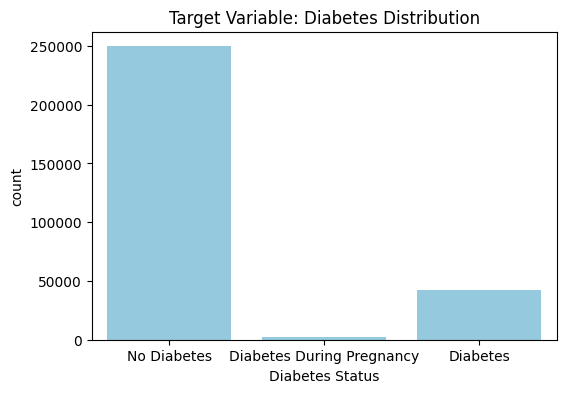

In [130]:
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes_status', data=df, color="skyblue")
plt.title("Target Variable: Diabetes Distribution")
plt.xlabel("Diabetes Status")
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Diabetes During Pregnancy', 'Diabetes'])
plt.show()

In [131]:
class_imb = df.groupby('diabetes_status').size()
print(f'Class distribution of {class_imb}')

Class distribution of diabetes_status
0.0    249662
1.0      2476
2.0     42477
dtype: int64


### insight
I have a class imbalance problem. 

I now want to randomly undersample the majority class to ensure class balance.

But first let's make the target feature binary

In [132]:
#Copy the old table to a new one.
df_binary = df

#Change the diabetics 2 to a 1 and pre-diabetics to remain the same, so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
df_binary['diabetes_status'] = df_binary['diabetes_status'].replace({2:1})

#Change the column name to diabetes_binary
df_binary = df_binary.rename(columns = {'diabetes_status': 'diabetes_binary'})
df_binary.diabetes_binary.unique()

array([0., 1.])

In [133]:
class_imb = df_binary.groupby('diabetes_binary').size()
print(f'Class distribution of {class_imb}')

Class distribution of diabetes_binary
0.0    249662
1.0     44953
dtype: int64


In [134]:
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = df_binary['diabetes_binary'] == 1
df_5050_1 = df_binary[is1]

#Get the 0s
is0 = df_binary['diabetes_binary'] == 0
df_5050_0 = df_binary[is0] 

#Select the 41884 random cases from the 0 (non-diabetes group). we already have 41884 cases from the diabetes risk group
df_5050_0_rand1 = df_5050_0.take(np.random.permutation(len(df_5050_0))[:41884])

#Append the 41884 1s to the 41884 randomly selected 0s
df_5050 = pd.concat([df_5050_0_rand1, df_5050_1], ignore_index=True)


In [135]:
df_5050.groupby(['diabetes_binary']).size()

diabetes_binary
0.0    41884
1.0    44953
dtype: int64

### Save the 50-50 balanced dataset to csv

In [136]:
df_5050.to_csv('./data/diabetes_binary_5050_split.csv', sep=",", index=False)

also save the original dataframe

In [137]:
df_binary.to_csv('./data/diabetes_binary.csv', sep=",", index=False)

### load the new dataset to a dataframe

In [138]:
df = pd.read_csv('./data/diabetes_binary_5050_split.csv')

In [139]:
col = df.columns
col

Index(['diabetes_binary', 'high_blood_pressure', 'high_cholesterol',
       'cholesterol_check', 'bmi', 'smoker', 'stroke',
       'heart_disease_or_attack', 'physical_activity', 'fruits', 'veggies',
       'heavy_alcohol_consumption', 'any_healthcare', 'no_docbc_cost',
       'gen_health', 'phys_health', 'diff_walk', 'sex', 'race', 'age',
       'income'],
      dtype='object')

In [140]:
numeric_cols = ['diabetes_binary', 'high_blood_pressure',
       'cholesterol_check', 'bmi', 'smoker', 'stroke',
       'heart_disease_or_attack', 'physical_activity', 'fruits', 'veggies',
       'heavy_alcohol_consumption', 'any_healthcare', 'no_docbc_cost',
       'gen_health', 'phys_health', 'diff_walk', 'sex', 'race', 'age',
       'income']

### Histograms and density plots

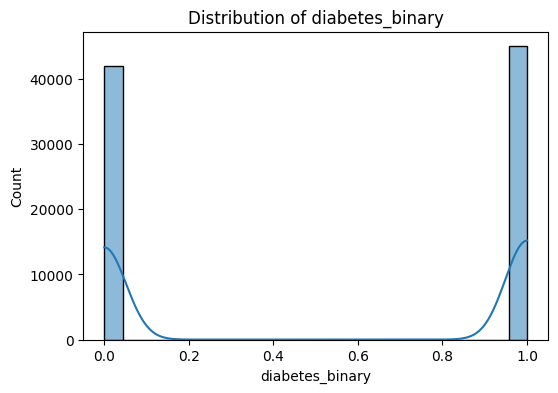

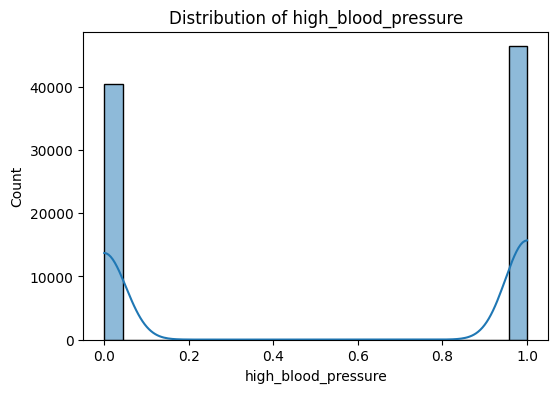

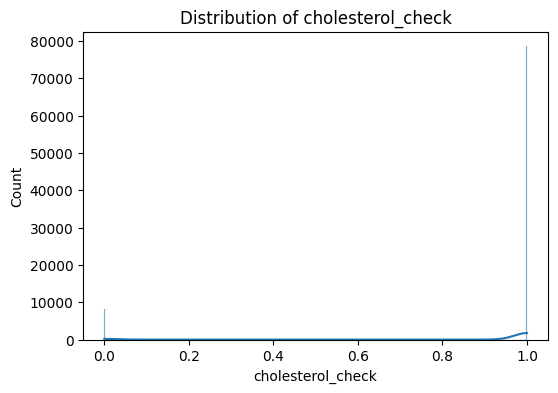

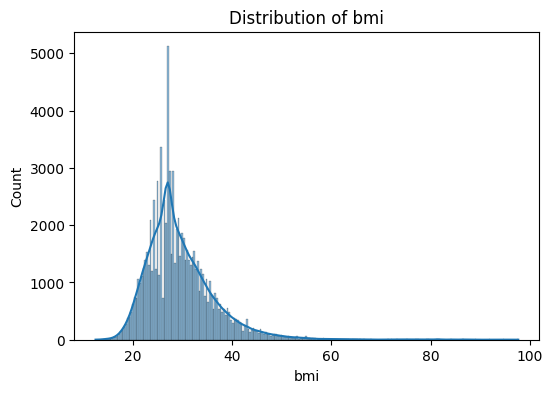

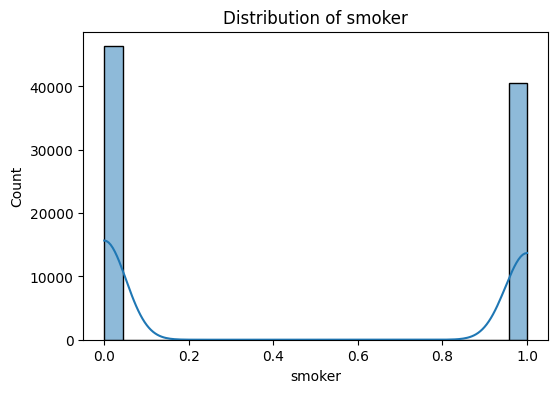

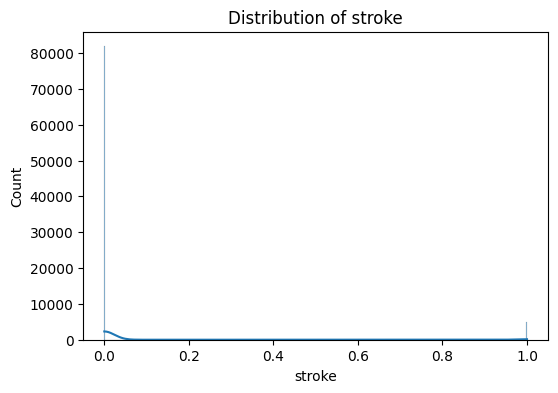

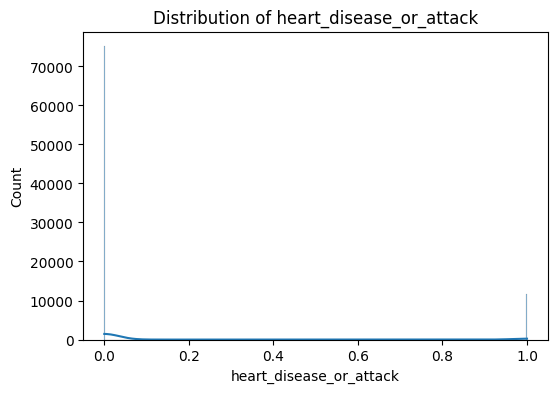

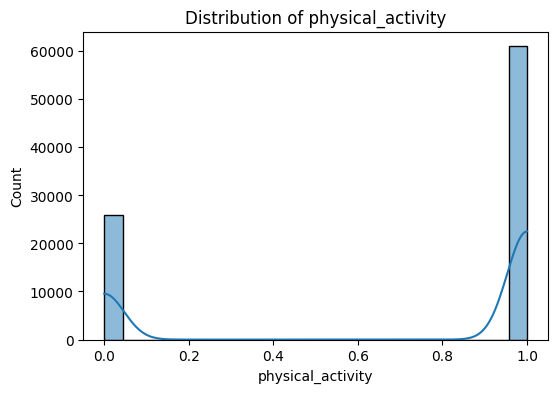

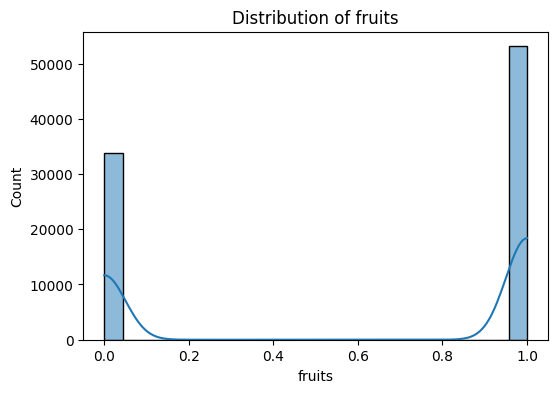

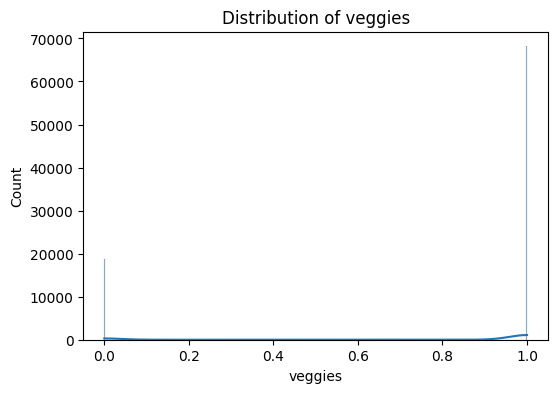

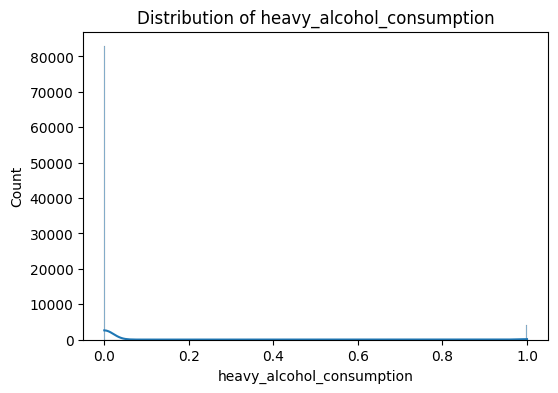

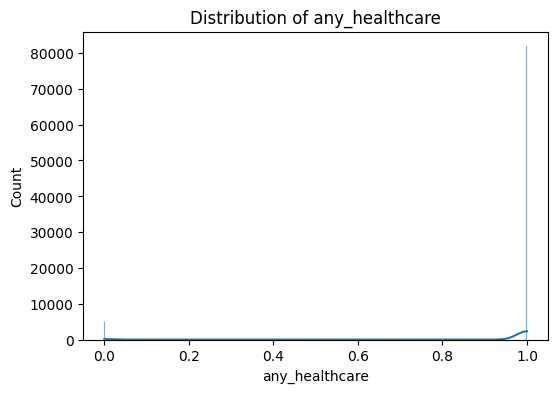

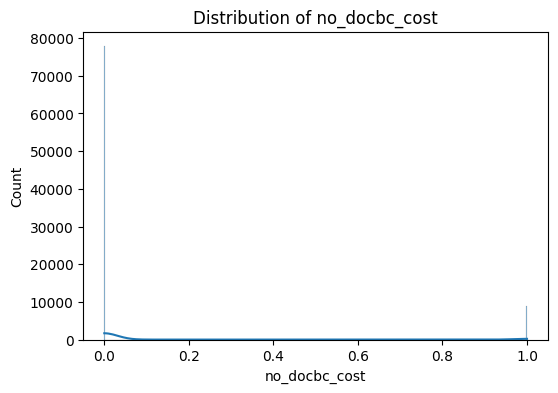

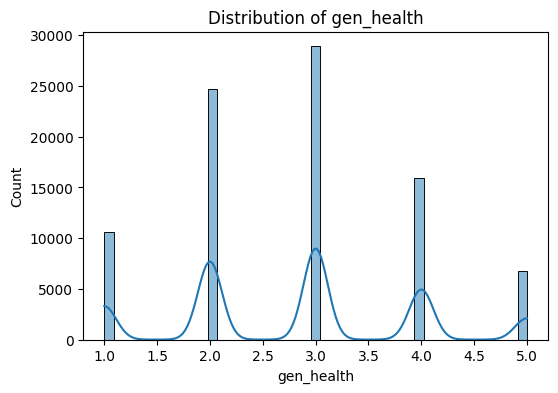

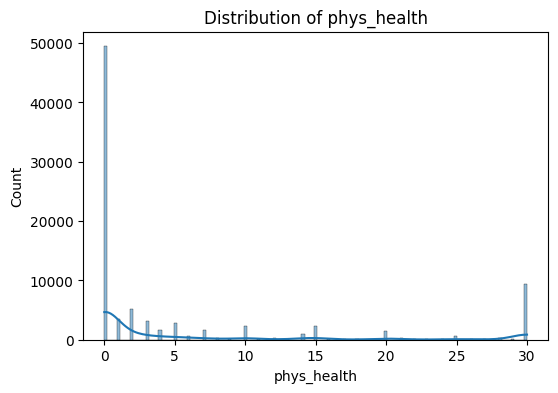

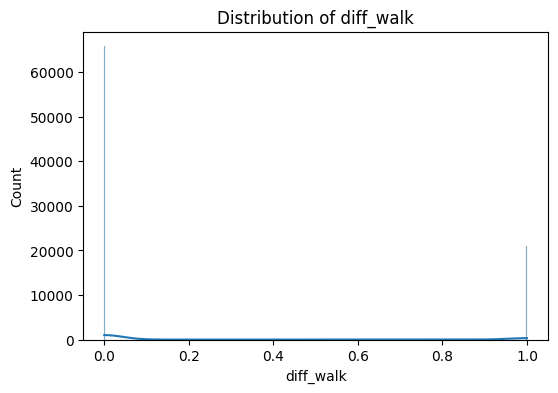

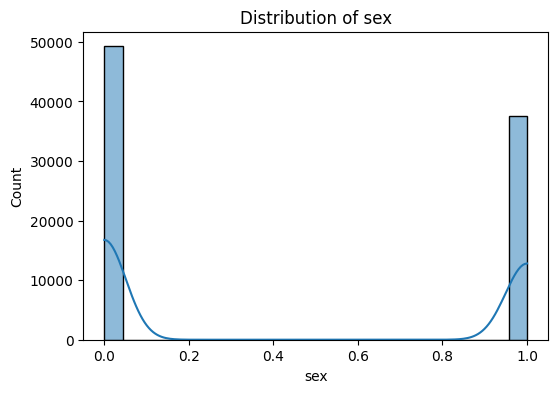

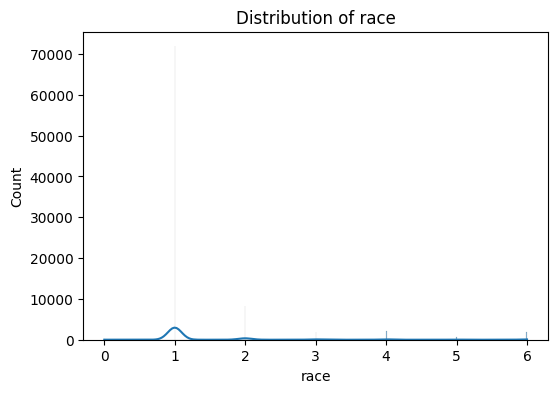

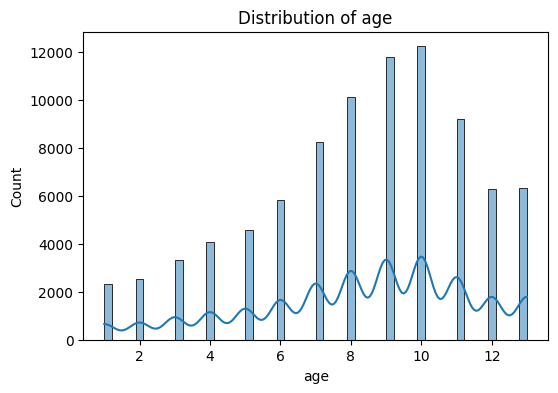

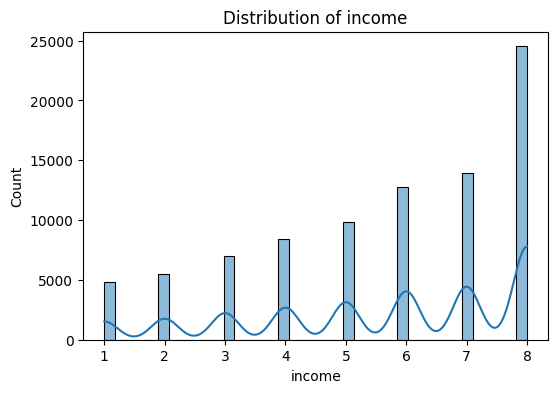

In [141]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Pairplots to check whether the data is linearly separable

In [142]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: ['high_cholesterol']


In [143]:
df


,diabetes_binary,high_blood_pressure,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,...,heavy_alcohol_consumption,any_healthcare,no_docbc_cost,gen_health,phys_health,diff_walk,sex,race,age,income
0,0.0,1.0,1.0,1.0,25.75,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0
1,0.0,0.0,0.0,1.0,26.61,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,5.0
2,0.0,0.0,0.0,1.0,25.82,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,4.0,2.0,1.0,0.0,1.0,8.0,6.0
3,0.0,0.0,missing,0.0,23.03,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,1.0
4,0.0,1.0,0.0,1.0,39.48,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,10.0,0.0,0.0,1.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86832,1.0,1.0,0.0,1.0,22.86,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,15.0,0.0,0.0,6.0,6.0,2.0
86833,1.0,0.0,1.0,1.0,29.05,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,10.0,6.0
86834,1.0,1.0,1.0,1.0,24.89,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,5.0,0.0,1.0,0.0,1.0,13.0,4.0
86835,1.0,1.0,1.0,1.0,18.42,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,1.0,0.0,6.0,11.0,4.0


In [156]:
df['bmi'].head()

0    25.75
1    26.61
2    25.82
3    23.03
4    39.48
Name: bmi, dtype: float64

In [144]:
features = ['bmi', 'phys_health', 'age', 'high_blood_pressure', 'stroke', 'smoker', 'diff_walk', 'race', 'any_healthcare']

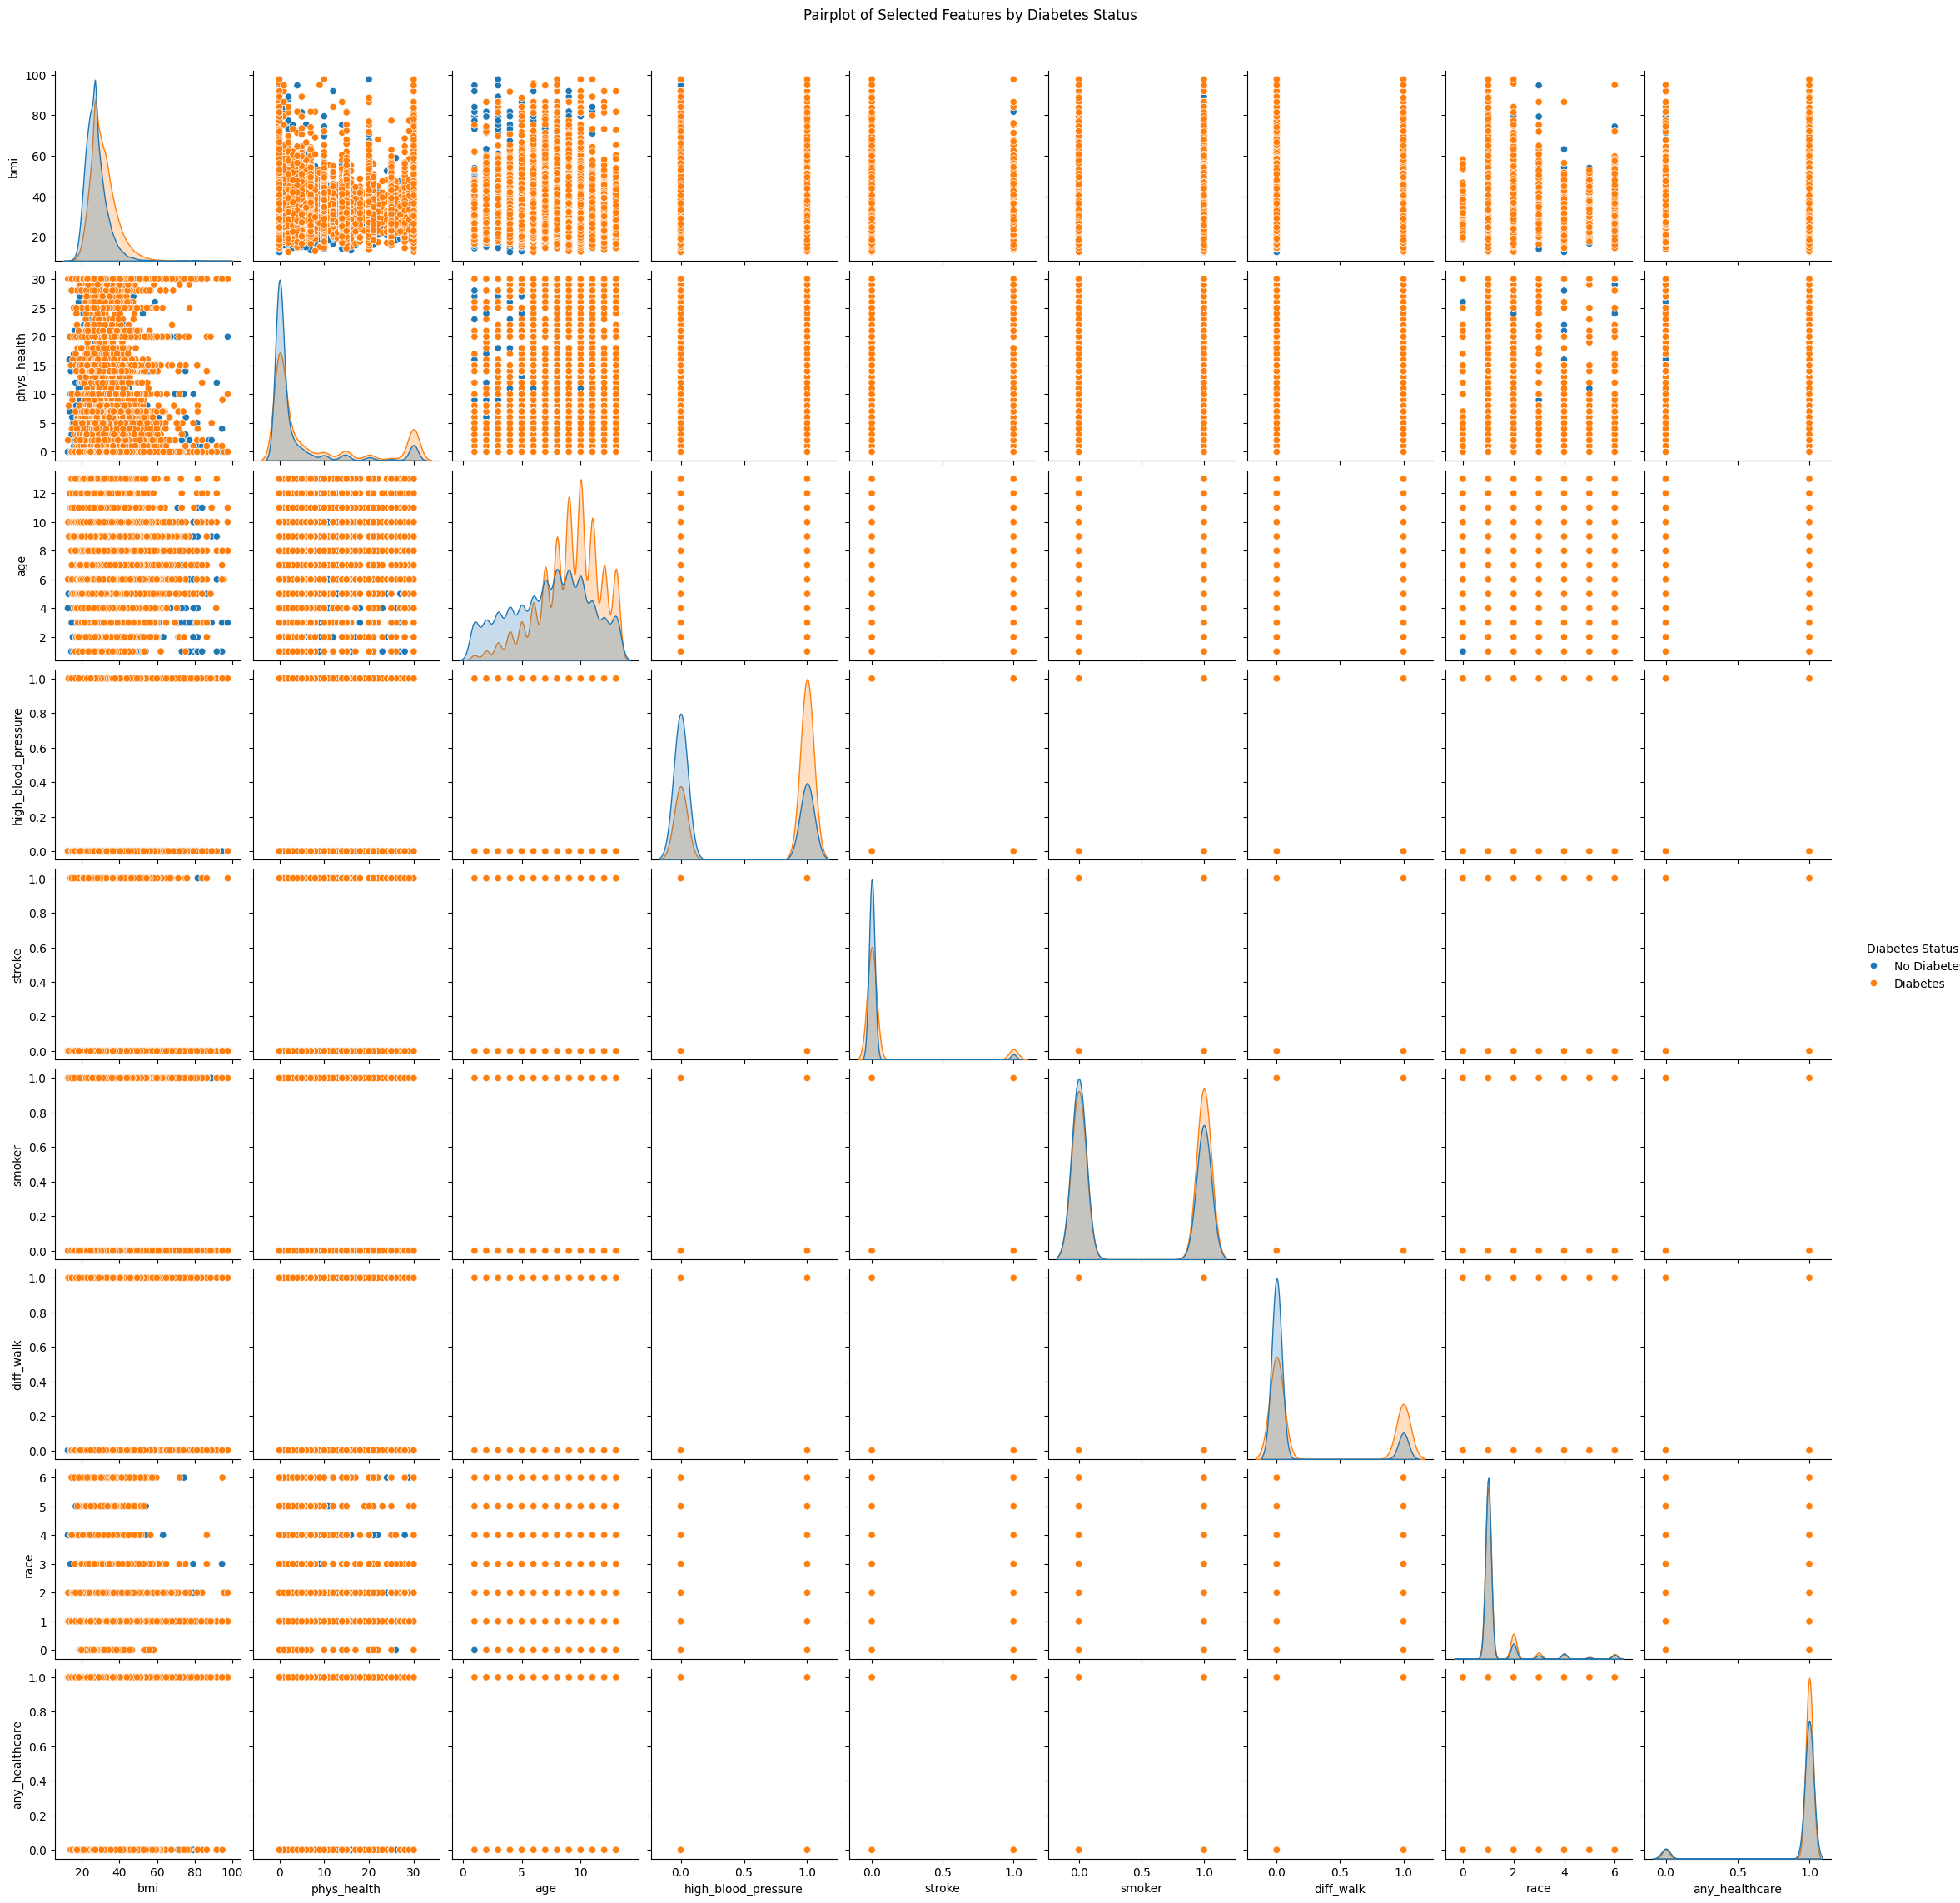

In [145]:

df_subset = df[features + ['diabetes_binary']]

pairplot = sns.pairplot(df_subset, hue='diabetes_binary', diag_kind='kde')
pairplot.fig.suptitle("Pairplot of Selected Features by Diabetes Status", y=1.02)
new_labels = ["No Diabetes", "Diabetes"]
for t, l in zip(pairplot._legend.texts, new_labels):
    t.set_text(l)

pairplot._legend.set_title("Diabetes Status")
pairplot._legend.set_bbox_to_anchor((1, 0.5))

plt.show()

### Boxplot to check for outliers

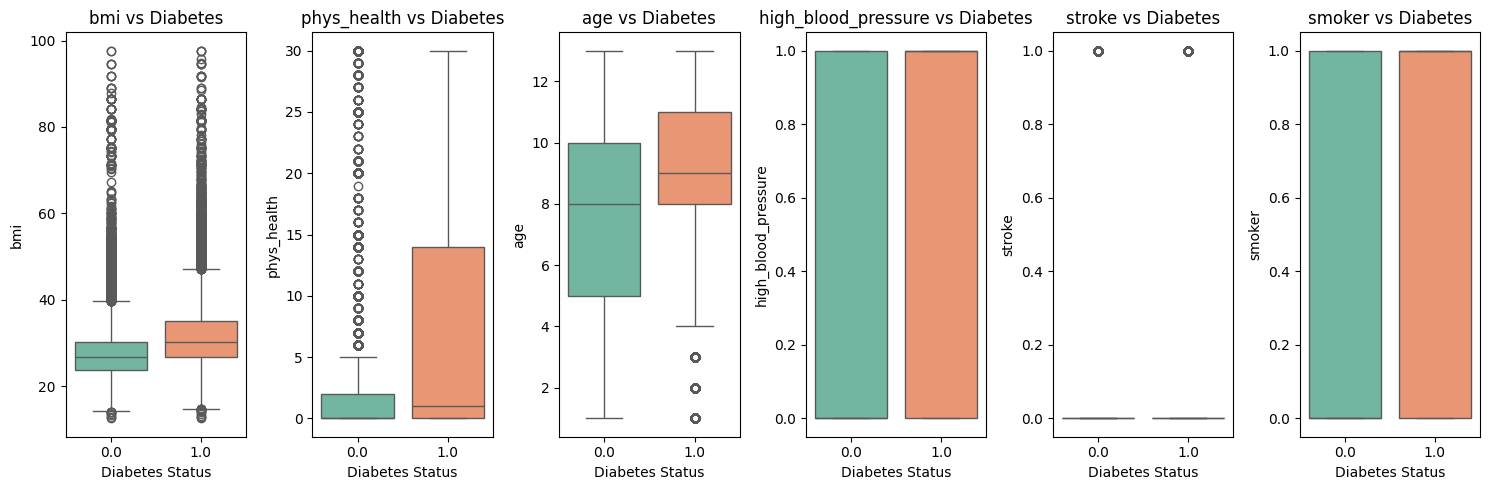

In [162]:
fig, axes = plt.subplots(1, 6, figsize=(15,5))

for ax, col in zip(axes, features):
    sns.boxplot(x='diabetes_binary', y=col, hue='diabetes_binary', 
            data=df, palette='Set2', legend=False, ax=ax)

    ax.set_title(f"{col} vs Diabetes")
    ax.set_xlabel("Diabetes Status")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


In [164]:
skew_df = df.skew(numeric_only=True) 
print("Skewness of df:\n", skew_df)


Skewness of df:
 diabetes_binary             -0.070730
high_blood_pressure         -0.136042
cholesterol_check           -2.754672
bmi                          1.873198
smoker                       0.134511
stroke                       3.799463
heart_disease_or_attack      2.139299
physical_activity           -0.885501
fruits                      -0.457936
veggies                     -1.386568
heavy_alcohol_consumption    4.341731
any_healthcare              -3.818720
no_docbc_cost                2.599833
gen_health                   0.185754
phys_health                  1.717141
diff_walk                    1.200011
sex                          0.270937
race                         3.389790
age                         -0.510752
income                      -0.617156
dtype: float64


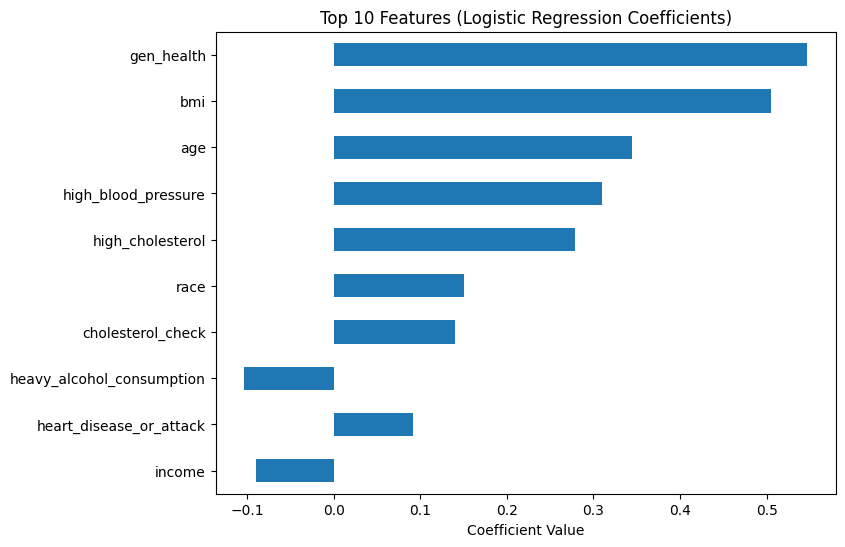

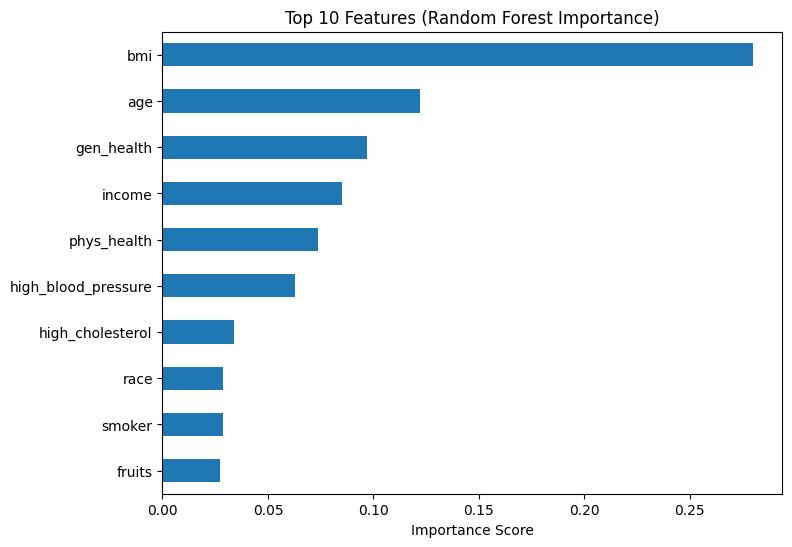

In [ ]:
# 7. Feature Importance
feature_names = X.columns.tolist()

# Logistic Regression coefficients
log_reg_clf = results["LogisticRegression"]["pipeline"].named_steps["clf"]
coefs = log_reg_clf.coef_[0]
log_reg_importance = pd.Series(coefs, index=feature_names).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 6))
log_reg_importance.head(10).plot(kind="barh")
plt.title("Top 10 Features (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

# Random Forest feature importances
rf_clf = results["RandomForest"]["pipeline"].named_steps["clf"]
rf_importance = pd.Series(rf_clf.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
rf_importance.head(10).plot(kind="barh")
plt.title("Top 10 Features (Random Forest Importance)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

## Future Work (afternoon)

- Hyperparameter tuning (e.g., GridSearchCV, RandomizedSearchCV).  
- Misclassifications of the false positives
- evaluation on the training data
- overfitting on the learning curve
- Explore advanced models (Gradient Boosting, XGBoost, Neural Networks).  
- Address fairness: ensure predictions are not biased against specific demographic groups.  
- check for outliers and linear separability
- deploy using Flask
- Build a **Streamlit app** for interactive prediction.